# **What is an Intrusion Detection System?**
---

An  Intrusion Detection System(IDS) is a is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered. It is a software application that scans a network or a system for harmful activity or breaches in predefined policy. Any malicious event or violation is normally reported either to an administrator or collected using a security information and event management (SIEM) system. A SIEM system integrates outputs from multiple sources and uses alarm filtering techniques to differentiate malicious activity from false alarms.

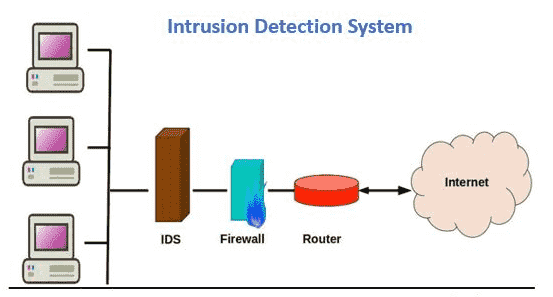

##**Classification of Intrusion Detection System**
****

IDS are classified into 5 types:

*   **Network Intrusion Detection System (NIDS):** NIDS are set up at a planned point within the network to examine traffic from all devices on the network. It performs an observation of passing traffic on the entire subnet and matches the traffic that is passed on the subnets to the collection of known attacks. Once an attack is identified or abnormal behavior is observed, the alert can be sent to the administrator.
 
 **Example:** Installing an NIDS on the subnet where firewalls are located in order to see if someone is trying to crack the firewall.

*   **Host Intrusion Detection System (HIDS):** HIDS run on independent hosts or devices on the network. A HIDS monitors the incoming and outgoing packets from the device only and will alert the administrator if suspicious or malicious activity is detected. It takes a snapshot of existing system files and compares it with the previous snapshot. If the analytical system files were edited or deleted, an alert is sent to the administrator to investigate.
 
 **Example:** Used on mission-critical machines, which are not expected to change their layout.

*   **Protocol-based Intrusion Detection System (PIDS):** PIDS consists a system or agent that would consistently reside at the front end of a server, controlling and interpreting the protocol between a user/device and the server. It is trying to secure the web server by regularly monitoring the HTTPS protocol stream and accept the related HTTP protocol. As HTTPS is un-encrypted before instantly entering its web presentation layer, then this system would need to reside in this interface, to use the HTTPS.

*   **Application Protocol-based Intrusion Detection System (APIDS):** APIDS is a system or agent that generally resides within a group of servers. It identifies the intrusions by monitoring and interpreting the communication on application-specific protocols.
  
  **Example:** Monitoring the SQL protocol explicit to the middleware as it transacts with the database in the web server.

*   **Hybrid Intrusion Detection System:** Hybrid intrusion detection system is a combination of two or more approaches of the intrusion detection system. In the hybrid intrusion detection system, host agent or system data is combined with network information to develop a complete view of the network system. Hybrid intrusion detection system is more effective in comparison to the other intrusion detection systems.

 **Example:** Prelude SIEM.

## **Detection Methods used in Intrusion Detection Systems**
****

*   **Signature-based Method:** Signature-based IDS detects the attacks on the basis of the specific patterns such as number of bytes or number of 1’s or number of 0’s in the network traffic. It also detects on the basis of the already known malicious instruction sequence that is used by the malware. The detected patterns in the IDS are known as signatures. Signature-based IDS can easily detect the attacks whose pattern(signature) already exists in system but it is quite difficult to detect the new malware attacks as their signature is not known.
*   **Anomaly-based Method:** Anomaly-based IDS was introduced to detect unknown malware attacks as new malware are developed rapidly. In anomaly-based IDS there is use of machine learning to create a trustful activity model and anything entering is compared with that model and it is declared suspicious if it is not found in model. Machine learning-based method has a better-generalized property in comparison to signature-based IDS as these models can be trained according to the applications and hardware configurations.


## **Dimensionality Reduction**


---



Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

In machine learning classification problems, there are often too many factors on the basis of which the final classification is done. These factors are basically variables called features. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play.

Dimensionality reduction can be explained through the example of a simple e-mail classification problem, where we need to classify whether the e-mail is spam or not. This can involve a large number of features, such as whether or not the e-mail has a generic title, the content of the e-mail, whether the e-mail uses a template, etc. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to a simple 2 dimensional space, and a 1-D problem to a simple line. The below figure illustrates this concept, where a 3-D feature space is split into two 2-D feature spaces, and later, if found to be correlated, the number of features can be reduced even further.

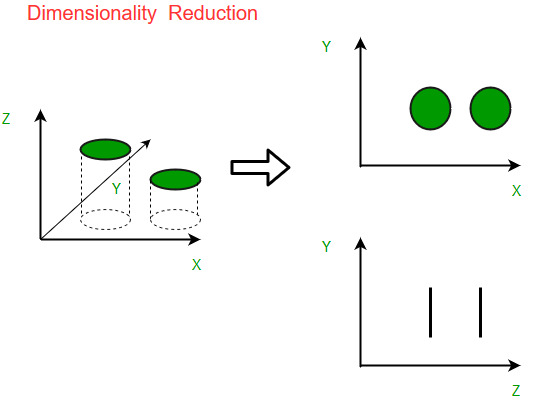

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_files = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IDS'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)

/content/drive/MyDrive/IDS/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Friday-WorkingHours-Morning.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Monday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Tuesday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/IDS/Wednesday-workingHours.pcap_ISCX.csv


In [4]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after droping null values, the length of df:", len(df))

original length of df: 2830743
after droping null values, the length of df: 2827876


In [5]:
df.Label.value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [6]:
df_experiment = df.copy()
df_experiment.Label.replace("Web.*", "Web Attack", regex=True, inplace=True)
df_experiment.Label.replace(r'.*Patator$', "Brute Force", regex=True,inplace=True)
df_experiment.Label.replace(["DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"], "DoS", inplace=True)
print(df_experiment.shape)
indexLabels = df_experiment[(df_experiment['Label']=='Infiltration') | (df_experiment['Label']=='Heartbleed')].index # index of Infiltration and heartbleed to drop 
df_experiment.drop(indexLabels , inplace=True)    # Drop the useless labels   
print(df_experiment.shape)   
df_experiment.Label.value_counts()

(2827876, 79)
(2827829, 79)


BENIGN         2271320
DoS             251712
PortScan        158804
DDoS            128025
Brute Force      13832
Web Attack        2180
Bot               1956
Name: Label, dtype: int64

In [7]:
df_experiment.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
t=df_experiment.Label
print(t.unique())
print(t.nunique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Web Attack' 'Brute Force' 'DoS']
7


In [9]:
# Using Label Encoder for Labels : Benign, Brute Force etc...
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
df_experiment['Label'] = le.fit_transform(df_experiment['Label'])
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)
df_experiment.head()

{'BENIGN': 0, 'Bot': 1, 'Brute Force': 2, 'DDoS': 3, 'DoS': 4, 'PortScan': 5, 'Web Attack': 6}


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


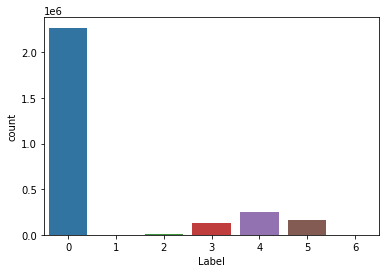

In [10]:
sns.countplot(df_experiment['Label'])

In [11]:
# # Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


X,y = df_experiment.drop(['Label'],axis=1), df_experiment['Label']

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 1956), (1, 1956), (2, 1956), (3, 1956), (4, 1956), (5, 1956), (6, 1956)]


In [12]:
from imblearn.over_sampling import SMOTE 
strategy = {0:15432,1:10456,2:9873,3:4500,4:2034,5:5067,6:7309}
smote = SMOTE(sampling_strategy=strategy)
# over = RandomOverSampler(strategy = strategy)
X_combined_sampled,y_combined_sampled = smote.fit_resample(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (15432) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1956)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (10456) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1956)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (9873) in class 2 will be larger than the number of samples in the majority class (class #0 -> 1956)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number 

In [13]:
print(sorted(Counter(y_combined_sampled).items()))
print(X_combined_sampled.shape)

[(0, 15432), (1, 10456), (2, 9873), (3, 4500), (4, 2034), (5, 5067), (6, 7309)]
(54671, 78)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


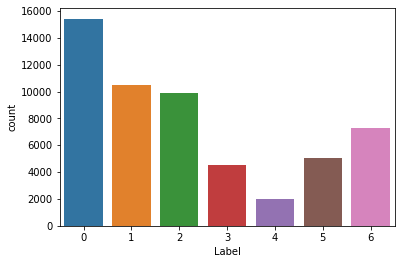

In [14]:
sns.countplot(y_combined_sampled)

In [15]:
dfs = pd.concat([X_combined_sampled,y_combined_sampled], axis=1)

In [16]:
dfs.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50424,4,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,53,208,2,2,64,120,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,47952,4,3,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,443,95042,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,51648,3,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [17]:
dfs['Label'].value_counts()

0    15432
1    10456
2     9873
6     7309
5     5067
3     4500
4     2034
Name: Label, dtype: int64

###Backward elimination

In [18]:
target = dfs['Label']

In [19]:
X1 = dfs.drop('Label',axis=1)
y1 = dfs['Label']

In [20]:
import statsmodels.api as sm

In [21]:
X_1 = sm.add_constant(X1)
#Fitting sm.OLS model
model = sm.OLS(y1,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                      0.000000e+00
Destination Port           0.000000e+00
Flow Duration              2.678992e-43
Total Fwd Packets          4.822649e-18
Total Backward Packets    3.026456e-166
                              ...      
Active Min                 3.008477e-04
Idle Mean                  1.344023e-05
Idle Std                   1.228570e-20
Idle Max                   6.466768e-36
Idle Min                   4.237429e-04
Length: 79, dtype: float64

In [22]:
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg By

In [23]:
lst =[]
lst =selected_features_BE

In [24]:
len(lst)

71

In [25]:
rt = pd.DataFrame(dfs[lst])

In [26]:
rt['Output'] = target

In [27]:
rt

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Output
0,50424,4,2,0,0,0,0,0,0.0,0.0,...,0,20,0.0,0.0,0,0.0,0.0,0,0,0
1,53,208,2,2,64,120,32,32,32.0,0.0,...,1,32,0.0,0.0,0,0.0,0.0,0,0,0
2,47952,4,3,0,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,0
3,443,95042,1,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,0
4,51648,3,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54666,80,5341156,3,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,6
54667,80,5659500,3,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,6
54668,80,5843155,3,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,6
54669,80,5101247,3,1,0,0,0,0,0.0,0.0,...,0,32,0.0,0.0,0,0.0,0.0,0,0,6


LSTm

In [28]:
X = rt.drop(['Output'], axis = 1)
X = np.array(X)
Y = np.array(rt['Output'])

In [29]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 42)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((38269, 71), (38269, 7), (16402, 71), (16402, 7))

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
import keras

In [35]:
in_dim = len(rt.columns)-1
print(in_dim)
model = Sequential()
model.add(Dense(50, input_dim = in_dim, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

optimizer = keras.optimizers.RMSprop(lr=0.00001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.fit(train_x, train_y, epochs = 38, batch_size = 32)
scores = model.evaluate(test_x, test_y)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

71
Epoch 1/38


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1196/1196 [==============================] - 4s 2ms/step - loss: 66894.6094 - accuracy: 0.2874
Epoch 2/38
1196/1196 [==============================] - 3s 2ms/step - loss: 3866.5618 - accuracy: 0.5226
Epoch 3/38
1196/1196 [==============================] - 3s 2ms/step - loss: 1563.1375 - accuracy: 0.6340
Epoch 4/38
1196/1196 [==============================] - 3s 2ms/step - loss: 912.0434 - accuracy: 0.7182
Epoch 5/38
1196/1196 [==============================] - 3s 2ms/step - loss: 615.7529 - accuracy: 0.8237
Epoch 6/38
1196/1196 [==============================] - 3s 2ms/step - loss: 498.7780 - accuracy: 0.8443
Epoch 7/38
1196/1196 [==============================] - 3s 2ms/step - loss: 411.9417 - accuracy: 0.8524
Epoch 8/38
1196/1196 [==============================] - 3s 2ms/step - loss: 385.0646 - accuracy: 0.8604
Epoch 9/38
1196/1196 [==============================] - 3s 2ms/step - loss: 330.7923 - accuracy: 0.8649
Epoch 10/38
1196/1196 [==============================] - 3s 2ms/step - 

In [36]:
y_pred=model.predict(test_x)
predic =np.argmax(y_pred,axis=1)

513/513 [==============================] - 1s 1ms/step


In [37]:
from sklearn.metrics import classification_report

In [38]:
test_y1=np.argmax(test_y, axis=1)

In [39]:
print(classification_report(test_y1,predic))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      4589
           1       0.96      0.99      0.98      3190
           2       0.97      0.99      0.98      2934
           3       0.93      0.96      0.94      1387
           4       0.83      0.86      0.85       600
           5       0.97      0.97      0.97      1469
           6       0.99      0.96      0.98      2233

    accuracy                           0.96     16402
   macro avg       0.94      0.95      0.95     16402
weighted avg       0.96      0.96      0.96     16402

